# 4.10 IC_ Coding Etiquette & Excel Reporting

### Context:
#### This task for this Exercise is split into two parts:- In the first part, you’ll continue to enrich your project data using the customer data you merged in the previous task to answer key business questions from Instacart. Your goal will be to provide better insight for customer profiling in terms of ads, bonus programs, and sales information.- In the second part, you’ll create a report that communicates your analysis process and results to Instacart. The report will describe each step you took over the course of this Achievement while also sharing your results and recommendations.otebook.
k.



## This script contains the following points:

#### 0. Importing Libraries
#### 1. Loading and Checking the Data
#### 2. Addressing PII Data
#### 3. Creating a Regional Segmentation of the Data
#### 4. Creating an Exclusion Flag for Low-Activity Customers
#### 5. Creating a Profiling Variable for Customers
#### 6. Creating a Visualization of the Profiles
#### 7. Creating Aggregates on a Customer-Profile Level
#### 8. Comparing Customer Profiles
#### 9. Creating Charts to Illustrate the Results
#### 10. Exporting the Final Dataset


## 0. Importing Libraries

In [1]:
# Import libraries: pandas, NumPy, os, 
# Import Visualization Libraries: matplotlib, seaborn, and scipy

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 1. Loading and Checking the Data

In [2]:
# Defining the path to the data files, folder path to my main project folder is now stored within variable 'path'

path = r'/Users/pau/06-05-2024 Instacart Basket Analysis'

In [3]:
# Loading "ords_prods_cust_merge.pkl" from the task 4.9. Part 1 as "df_final"

df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

In [4]:
# Checking "ords_prods_cust_merge.pkl" data is correctly loaded

print(df_final.head())
print(df_final.info())
df_final.shape

  product_id                product_name aisle_id department_id  prices  \
0          1  Chocolate Sandwich Cookies       61            19     5.8   
1          1  Chocolate Sandwich Cookies       61            19     5.8   
2          1  Chocolate Sandwich Cookies       61            19     5.8   
3          1  Chocolate Sandwich Cookies       61            19     5.8   
4          1  Chocolate Sandwich Cookies       61            19     5.8   

  order_id user_id  order_number  orders_day_of_week  order_hour_of_day  ...  \
0  3139998     138            28                   6                 11  ...   
1  1977647     138            30                   6                 17  ...   
2   389851     709             2                   0                 21  ...   
3   652770     764             1                   3                 13  ...   
4  1813452     764             3                   4                 17  ...   

   first_name  surname  gender      state age date_joined dependants

(32404859, 34)

## 2. Addressing PII Data

#### Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [5]:
# Removing columns that contain personally identifiable information: 'first_name', 'surname'

df_final.drop(columns=['first_name', 'surname'], inplace=True)

In [6]:
# Verifying the results of the changes

print(df_final.head())

  product_id                product_name aisle_id department_id  prices  \
0          1  Chocolate Sandwich Cookies       61            19     5.8   
1          1  Chocolate Sandwich Cookies       61            19     5.8   
2          1  Chocolate Sandwich Cookies       61            19     5.8   
3          1  Chocolate Sandwich Cookies       61            19     5.8   
4          1  Chocolate Sandwich Cookies       61            19     5.8   

  order_id user_id  order_number  orders_day_of_week  order_hour_of_day  ...  \
0  3139998     138            28                   6                 11  ...   
1  1977647     138            30                   6                 17  ...   
2   389851     709             2                   0                 21  ...   
3   652770     764             1                   3                 13  ...   
4  1813452     764             3                   4                 17  ...   

   order_frequency     frequency_flag  gender      state age date_jo

## 3. Creating a Regional Segmentation of the Data

#### The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set. 

### 3.1. Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions). 


In [7]:
# Creating a region column and grouping states into Region 1 (Northeast)

df_final.loc[df_final['state'].isin([
    'Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island',
    'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'Region'] = 'Northeast'

In [8]:
# Creating a region column and grouping states into Region 2 (Midwest)

df_final.loc[df_final['state'].isin([
    'Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 
    'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 
    'Minnesota', 'Iowa', 'Missouri']), 'Region'] = 'Midwest'

In [9]:
# Creating a region column and grouping states into Region 3 (South)

df_final.loc[df_final['state'].isin([
    'Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 
    'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 
    'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'Region'] = 'South'

In [10]:
# Creating a region column and grouping states into Region 4 (West)

df_final.loc[df_final['state'].isin([
    'Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 
    'Colorado', 'Arizona', 'New Mexico', 'Alaska', 
    'Washington', 'Oregon', 'California', 'Hawaii']), 'Region'] = 'West'

In [11]:
# Checking the results using the "value_counts" function

df_final['Region'].value_counts(dropna= False)

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

### 3.2. Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [12]:
# Option 1: by creating a Crosstab between 'region' and 'spending_flag'

# comparing spending habits in different U.S. regions
crosstab_region_spending = pd.crosstab(df_final['Region'], df_final['spending_flag'], dropna = False)
# displaying the results, we could also save it to clipboard and open in Excel: crosstab_region_spending.to_clipboard()
crosstab_region_spending

spending_flag,High_spender,Low_spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [13]:
# Option 2: by grouping 

# region_spending = df_final.groupby(['Region', 'spending_flag']).size().unstack(fill_value=0)

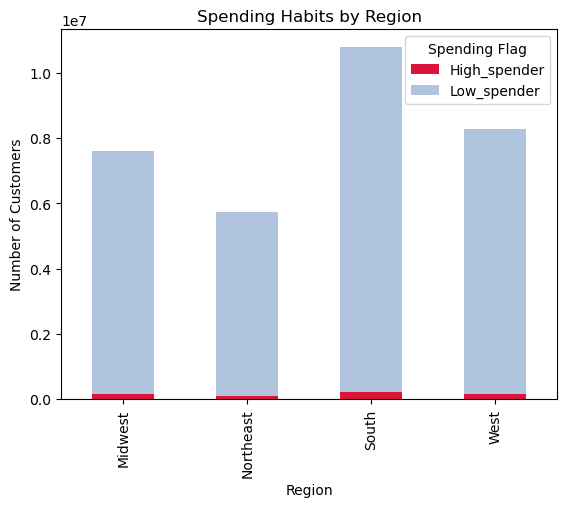

In [14]:
# Plotting the data with a stacked bar chart

bar_spending_by_region = crosstab_region_spending.plot(kind='bar', color=['crimson', 'lightsteelblue'], stacked=True)
plt.title('Spending Habits by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.legend(title='Spending Flag')
plt.show()

#### We can determine that there is not a big difference in spending habits between the different U.S. regions. 

## 4. Creating an Exclusion Flag for Low-Activity Customers

#### The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [15]:
# Creating an exclusion flag 

df_final['exclusion_flag'] = np.where(df_final['max_order'] < 5, 'Excluded', 'Included')

In [16]:
# Checking the results using the "value_counts" function

df_final['exclusion_flag'].value_counts()

exclusion_flag
Included    30964564
Excluded     1440295
Name: count, dtype: int64

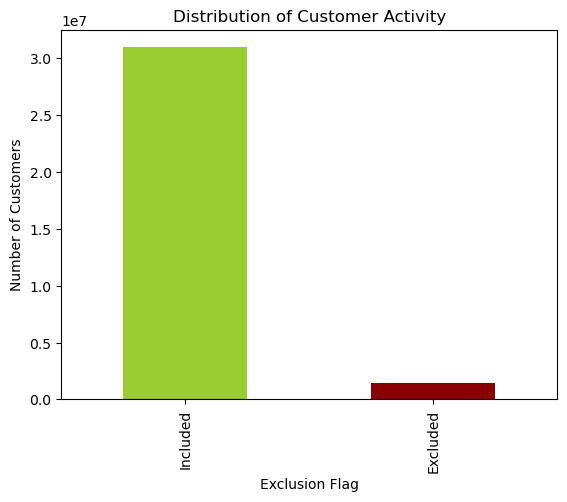

In [17]:
# Visualization of excluded vs included customers

exclusion_counts = df_final['exclusion_flag'].value_counts()
bar_exclusion = exclusion_counts.plot(kind='bar', color=['yellowgreen', 'darkred'])
plt.title('Distribution of Customer Activity')
plt.xlabel('Exclusion Flag')
plt.ylabel('Number of Customers')
plt.show()

In [18]:
# Separating the subsets

excluded_customers = df_final[df_final['exclusion_flag'] == 'Excluded']
included_customers = df_final[df_final['exclusion_flag'] == 'Included']

In [19]:
# Exporting the excluded customers subset

excluded_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'excluded_customers.pkl'))

In [20]:
# Filtering the dataframe to exclude Low-Activity customers

df_final = df_final[df_final['exclusion_flag'] == 'Included']

In [21]:
# Checking the results of the filtering

print(df_final.head())
print(df_final.info())
df_final.shape

  product_id                product_name aisle_id department_id  prices  \
0          1  Chocolate Sandwich Cookies       61            19     5.8   
1          1  Chocolate Sandwich Cookies       61            19     5.8   
2          1  Chocolate Sandwich Cookies       61            19     5.8   
5          1  Chocolate Sandwich Cookies       61            19     5.8   
6          1  Chocolate Sandwich Cookies       61            19     5.8   

  order_id user_id  order_number  orders_day_of_week  order_hour_of_day  ...  \
0  3139998     138            28                   6                 11  ...   
1  1977647     138            30                   6                 17  ...   
2   389851     709             2                   0                 21  ...   
5  1701441     777            16                   1                  7  ...   
6  1871483     825             3                   2                 14  ...   

   gender                 state  age  date_joined dependants  \
0   

(30964564, 34)

## 5. Creating a Profiling Variable for Customers

#### The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database.

#### Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 
#### You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [22]:
# Creating Age Profiles

df_final.loc[df_final['age'] < 30, 'age_profile'] = 'Young Adult'
df_final.loc[(df_final['age'] >= 30) & (df_final['age'] < 60), 'age_profile'] = 'Middle Aged'
df_final.loc[df_final['age'] >= 60, 'age_profile'] = 'Senior'

In [23]:
# Checking the results using the "value_counts" function

df_final['age_profile'].value_counts()

age_profile
Middle Aged    14572457
Senior         10574504
Young Adult     5817603
Name: count, dtype: int64

In [24]:
# Creating Income Profiles

df_final.loc[df_final['income'] < 50000, 'income_profile'] = 'Low Income'
df_final.loc[(df_final['income'] >= 50000) & (df_final['income'] < 100000), 'income_profile'] = 'Middle Income'
df_final.loc[df_final['income'] >= 100000, 'income_profile'] = 'High Income'


In [25]:
# Checking the results using the "value_counts" function

df_final['income_profile'].value_counts()

income_profile
High Income      14207402
Middle Income    13394608
Low Income        3362554
Name: count, dtype: int64

In [26]:
# Creating Dependents Profiles

df_final.loc[df_final['dependants'] == 0, 'dependents_profile'] = 'Single'
df_final.loc[(df_final['dependants'] > 0) & (df_final['dependants'] <= 2), 'dependents_profile'] = 'Small Family'
df_final.loc[df_final['dependants'] > 2, 'dependents_profile'] = 'Large Family'

In [27]:
# Checking the results using the "value_counts" function

df_final['dependents_profile'].value_counts()

dependents_profile
Small Family    15452367
Large Family     7772516
Single           7739681
Name: count, dtype: int64

In [28]:
# Loading 'departments_wrangled.csv' to check the departments

df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [29]:
# Creating Department-Based Profiles for selected departments

df_final.loc[df_final['department_id'] == '1', 'department_profile'] = 'Frozen Food Buyer'
df_final.loc[df_final['department_id'] == '3', 'department_profile'] = 'Bakery Item Purchaser'
df_final.loc[df_final['department_id'] == '4', 'department_profile'] = 'Fresh Produce Buyer'
df_final.loc[df_final['department_id'] == '5', 'department_profile'] = 'Alcohol Consumer'
df_final.loc[df_final['department_id'] == '6', 'department_profile'] = 'International Item Purchaser'
df_final.loc[df_final['department_id'] == '7', 'department_profile'] = 'Beverages Consumer'
df_final.loc[df_final['department_id'] == '8', 'department_profile'] = 'Pet Owner'
df_final.loc[df_final['department_id'] == '9', 'department_profile'] = 'Dry goods pasta Consumer'
df_final.loc[df_final['department_id'] == '11', 'department_profile'] = 'Personal Care Buyer'
df_final.loc[df_final['department_id'] == '12', 'department_profile'] = 'Meat & Seafood Consumer'
df_final.loc[df_final['department_id'] == '13', 'department_profile'] = 'Pantry Consumer'
df_final.loc[df_final['department_id'] == '14', 'department_profile'] = 'Breakfast Consumer'
df_final.loc[df_final['department_id'] == '15', 'department_profile'] = 'Canned Goods Purchaser'
df_final.loc[df_final['department_id'] == '16', 'department_profile'] = 'Dairy & Eggs Buyer'
df_final.loc[df_final['department_id'] == '17', 'department_profile'] = 'Household Consumer'
df_final.loc[df_final['department_id'] == '18', 'department_profile'] = 'Baby Product Shopper'
df_final.loc[df_final['department_id'] == '19', 'department_profile'] = 'Snack Purchaser'
df_final.loc[df_final['department_id'] == '20', 'department_profile'] = 'Deli Consumer'


# For customers who do not fall into the above categories

df_final.loc[~df_final['department_id'].isin(['1', '3', '4', '5', '6', '7', '8', '9', '11','12', '13', '14','15', '16', '17', '18', '19', '20']), 'department_profile'] = 'Other Shoppers'


In [30]:
# Checking the results using the "value_counts" function

df_final['department_profile'].value_counts()

department_profile
Fresh Produce Buyer             9079273
Dairy & Eggs Buyer              5177182
Snack Purchaser                 2766406
Beverages Consumer              2571901
Frozen Food Buyer               2121731
Pantry Consumer                 1782705
Bakery Item Purchaser           1120828
Canned Goods Purchaser          1012074
Deli Consumer                   1003834
Dry goods pasta Consumer         822136
Household Consumer               699857
Meat & Seafood Consumer          674781
Breakfast Consumer               670850
Personal Care Buyer              424306
Baby Product Shopper             410392
International Item Purchaser     255991
Alcohol Consumer                 144627
Other Shoppers                   132630
Pet Owner                         93060
Name: count, dtype: int64

In [31]:
# Creating order timing profiles based on "order_hour_of_day"

df_final.loc[df_final['order_hour_of_day'] < 12, 'timing_profile'] = 'Morning Buyer'
df_final.loc[(df_final['order_hour_of_day'] >= 12) & (df_final['order_hour_of_day'] < 18), 'timing_profile'] = 'Afternoon Buyer'
df_final.loc[df_final['order_hour_of_day'] >= 18, 'timing_profile'] = 'Evening Buyer'

In [32]:
# Checking the results using the "value_counts" function

df_final['timing_profile'].value_counts()

timing_profile
Afternoon Buyer    14534966
Morning Buyer      10998902
Evening Buyer       5430696
Name: count, dtype: int64

In [33]:
# Creating order day of the week profiles

df_final.loc[df_final['orders_day_of_week'].isin([0, 6]), 'day_of_week_profile'] = 'Weekend Shopper'  # Sunday (0) and Saturday (6)
df_final.loc[df_final['orders_day_of_week'].isin([1, 2, 3, 4, 5]), 'day_of_week_profile'] = 'Weekday Shopper'  # Monday to Friday

In [34]:
# Checking the results using the "value_counts" function

df_final['day_of_week_profile'].value_counts()

day_of_week_profile
Weekday Shopper    20764650
Weekend Shopper    10199914
Name: count, dtype: int64

In [35]:
# Viewing the DataFrame to confirm profile columns are added

print(df_final[['age_profile', 'income_profile', 'dependents_profile', 'department_profile', 'timing_profile', 'day_of_week_profile']].head())

   age_profile income_profile dependents_profile department_profile  \
0       Senior     Low Income       Small Family    Snack Purchaser   
1       Senior     Low Income       Small Family    Snack Purchaser   
2       Senior    High Income       Small Family    Snack Purchaser   
5  Middle Aged  Middle Income       Small Family    Snack Purchaser   
6  Young Adult     Low Income       Large Family    Snack Purchaser   

    timing_profile day_of_week_profile  
0    Morning Buyer     Weekend Shopper  
1  Afternoon Buyer     Weekend Shopper  
2    Evening Buyer     Weekend Shopper  
5    Morning Buyer     Weekday Shopper  
6  Afternoon Buyer     Weekday Shopper  


## 6. Creating a Visualization of the Profiles

#### Create an appropriate visualization to show the distribution of profiles.

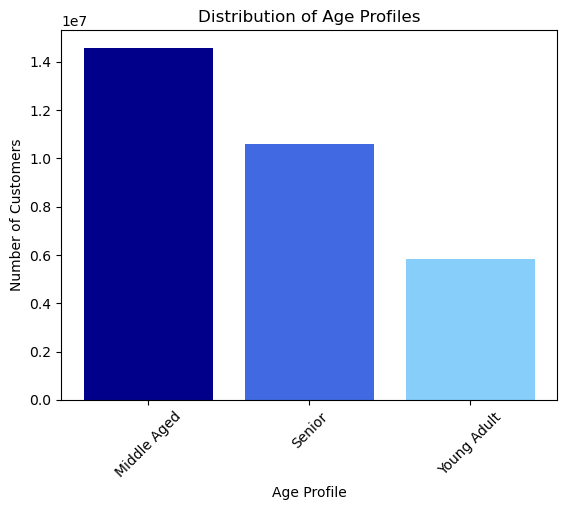

In [36]:
# Creating Distribution of Age Profiles Visualization

age_profile_counts = df_final['age_profile'].value_counts()
age_profile_counts = age_profile_counts.sort_index()
plt.bar(age_profile_counts.index, age_profile_counts.values, color=['darkblue','royalblue','lightskyblue'])
plt.title('Distribution of Age Profiles')
plt.xlabel('Age Profile')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
age_profile_bar = plt.gcf()
plt.show()

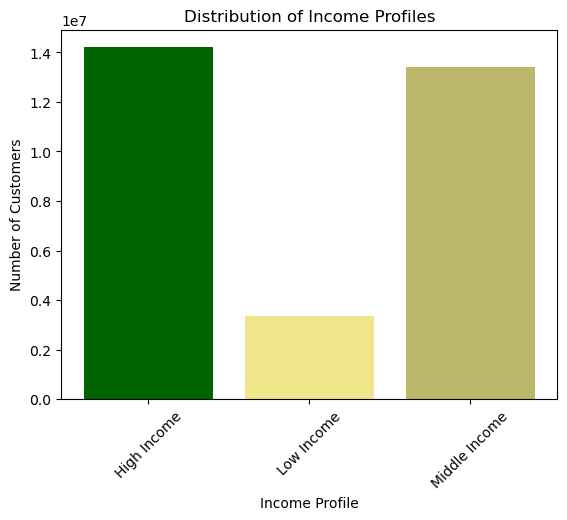

In [37]:
# Creating Distribution of Income Profiles Visualization

income_profile_counts = df_final['income_profile'].value_counts()
income_profile_counts = income_profile_counts.sort_index()
plt.bar(income_profile_counts.index, income_profile_counts.values, color=['darkgreen', 'khaki','darkkhaki'])
plt.title('Distribution of Income Profiles')
plt.xlabel('Income Profile')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
income_profile_bar = plt.gcf()
plt.show()

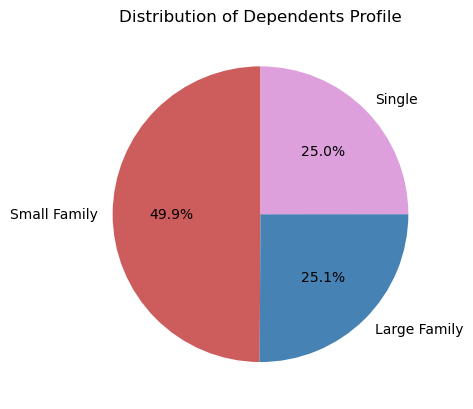

In [38]:
# Creating Visualization of the number of Dependents Profile 

dependents_counts = df_final['dependents_profile'].value_counts()
dependents_profile_pie = dependents_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['indianred','steelblue', 'plum'])
plt.title('Distribution of Dependents Profile')
plt.ylabel('')
plt.show()

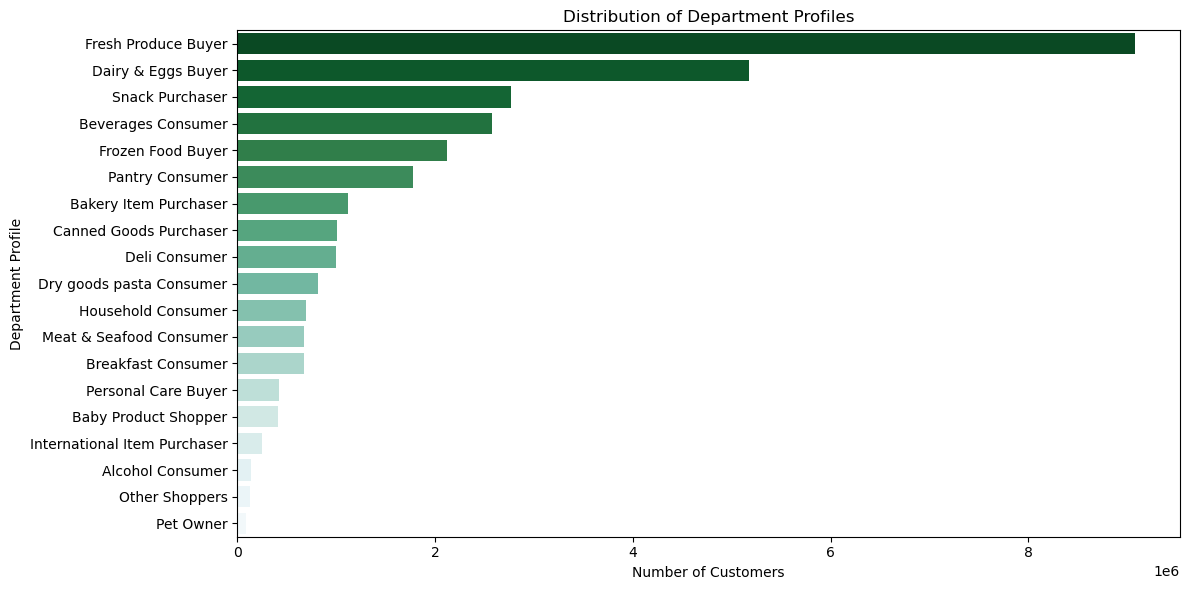

In [39]:
# Creating Visualization of Department-Based Profile 

order = df_final['department_profile'].value_counts().index
department_profile_bar = plt.figure(figsize=(12, 6))
sns.countplot(data=df_final, y='department_profile', palette='BuGn_r', order=order)
plt.title('Distribution of Department Profiles')
plt.xlabel('Number of Customers')
plt.ylabel('Department Profile')
plt.xticks()
plt.tight_layout()
plt.show()

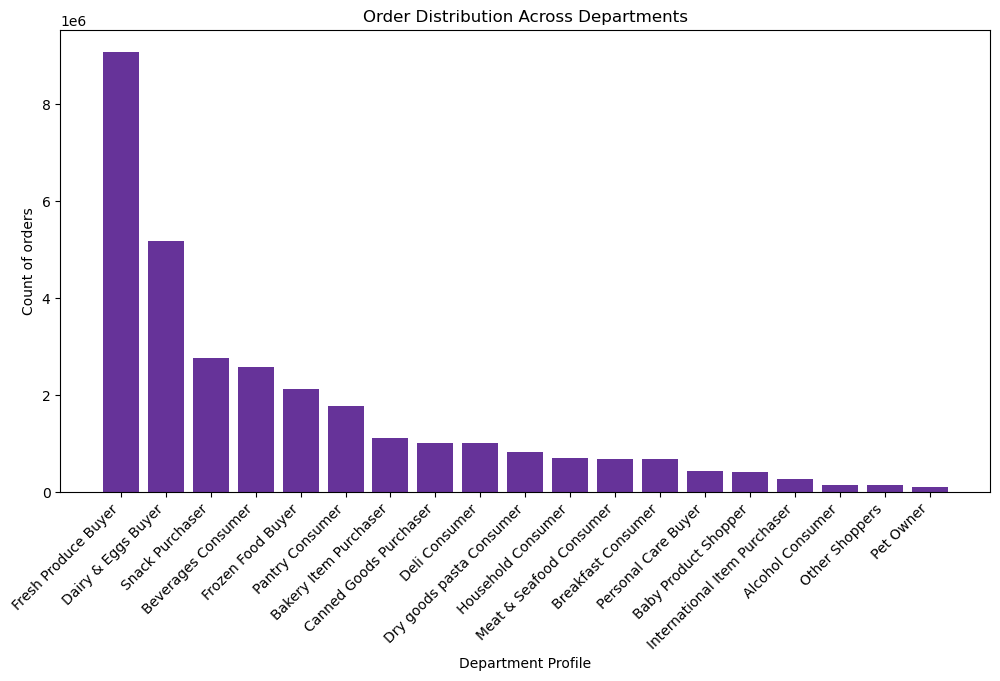

In [40]:
# Creating Histogram of the number of orders across departments

department_counts = df_final['department_profile'].value_counts()
department_counts_sorted = department_counts.sort_values(ascending=False)
departments_profile_histo = plt.figure(figsize=(12, 6))
plt.bar(department_counts_sorted.index, department_counts_sorted.values, color='rebeccapurple')
plt.title('Order Distribution Across Departments')
plt.xlabel('Department Profile')
plt.ylabel('Count of orders')
plt.xticks(rotation=45, ha='right')
plt.show()

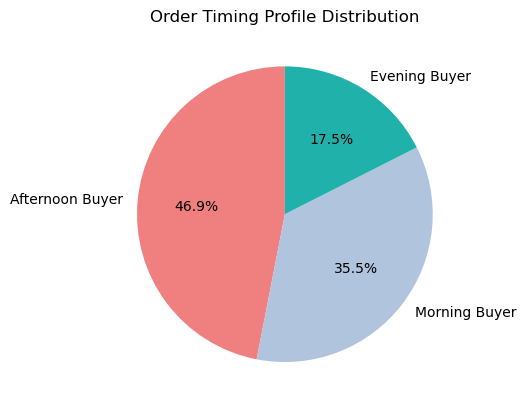

In [41]:
# Creating Visualization of Order Timing Profile 

timing_counts = df_final['timing_profile'].value_counts()
timing_profile_pie = timing_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightsteelblue', 'lightseagreen'])
plt.title('Order Timing Profile Distribution')
plt.ylabel('')
plt.show()

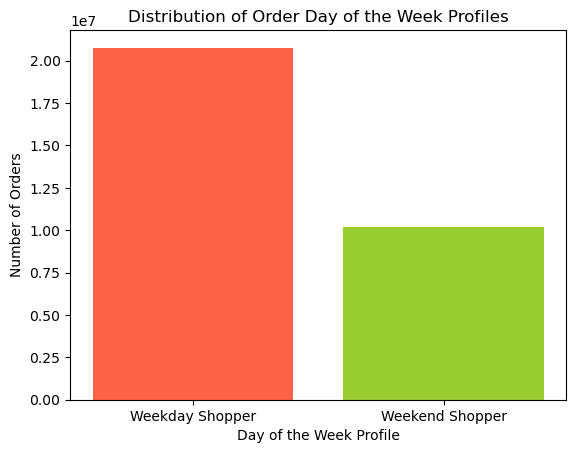

In [42]:
# Creating Visualization of Order Day of the Week Profile 

day_of_week_counts = df_final['day_of_week_profile'].value_counts().sort_index()
plt.bar(day_of_week_counts.index, day_of_week_counts.values, color=['tomato', 'yellowgreen'])
plt.title('Distribution of Order Day of the Week Profiles')
plt.xlabel('Day of the Week Profile')
plt.ylabel('Number of Orders')
day_of_week_profile_bar = plt.gcf()
plt.show()

## 7. Creating Aggregates on a Customer-Profile Level

#### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [43]:
# Aggregation for Age Profile

age_profile_agg = df_final.groupby('age_profile').agg({'order_number': ['max', 'mean', 'min'], 'prices': ['max', 'mean', 'min']})
age_profile_agg

order_number                prices               
                     max       mean min    max      mean  min
age_profile                                                  
Middle Aged           99  17.865629   1   25.0  7.790417  1.0
Senior                99  17.807616   1   25.0  7.795446  1.0
Young Adult           99  17.803483   1   25.0  7.782198  1.0

In [44]:
# Aggregation for Income Profile

income_profile_agg = df_final.groupby('income_profile').agg({'order_number': ['max', 'mean', 'min'], 'prices': ['max', 'mean', 'min']})
income_profile_agg

order_number                prices               
                        max       mean min    max      mean  min
income_profile                                                  
High Income              99  17.918880   1   25.0  7.953438  1.0
Low Income               99  16.835516   1   25.0  6.707347  1.0
Middle Income            99  17.994953   1   25.0  7.889854  1.0

In [45]:
# Aggregation for Number of Dependents Profile

dependents_profile_agg = df_final.groupby('dependents_profile').agg({'order_number': ['max', 'mean', 'min'], 'prices': ['max', 'mean', 'min']})
dependents_profile_agg

order_number                prices               
                            max       mean min    max      mean  min
dependents_profile                                                  
Large Family                 99  17.837412   1   25.0  7.792886  1.0
Single                       99  17.957922   1   25.0  7.789550  1.0
Small Family                 99  17.770497   1   25.0  7.789957  1.0

In [46]:
# Aggregation for Department-Based Profile

department_profile_agg = df_final.groupby('department_profile').agg({'order_number': ['max', 'mean', 'min'], 'prices': ['max', 'mean', 'min']})
department_profile_agg

order_number                prices             \
                                      max       mean min    max       mean   
department_profile                                                           
Alcohol Consumer                       99  16.034226   1   15.0   8.150699   
Baby Product Shopper                   99  19.867090   1   15.0   7.634399   
Bakery Item Purchaser                  99  17.856619   1   15.0   7.857482   
Beverages Consumer                     99  17.901479   1   15.0   7.682556   
Breakfast Consumer                     99  17.469987   1   14.9   8.031647   
Canned Goods Purchaser                 99  16.933858   1   15.0   7.546660   
Dairy & Eggs Buyer                     99  18.324695   1   15.0   8.336372   
Deli Consumer                          99  17.144802   1   15.0   7.783347   
Dry goods pasta Consumer               99  16.633019   1   15.0   7.349370   
Fresh Produce Buyer                    99  18.495730   1   15.0   7.980348   
Frozen Food Buyer                      99  16.160739   1   15.0   7.733725   
Household Consumer                     99  16.438914   1   15.0   7.379951   
International Item Purchaser           99  17.174694   1   15.0   7.678797   
Meat & Seafood Consumer                99  16.576910   1   25.0  16.300034   
Other Shoppers                         99  21.798010   1   15.0   8.140808   
Pantry Consumer                        99  17.328319   1   20.0   8.014482   
Personal Care Buyer                    99  16.933392   1   15.0   7.998744   
Pet Owner                              99  15.995927   1   15.0   7.887489   
Snack Purchaser                        99  17.830354   1    7.0   4.275555   

                                   
                              min  
department_profile                 
Alcohol Consumer              1.0  
Baby Product Shopper          1.0  
Bakery Item Purchaser         1.0  
Beverages Consumer            1.0  
Breakfast Consumer            1.0  
Canned Goods Purchaser        1.0  
Dairy & Eggs Buyer            1.0  
Deli Consumer                 1.0  
Dry goods pasta Consumer      1.0  
Fresh Produce Buyer           1.0  
Frozen Food Buyer             1.0  
Household Consumer            1.0  
International Item Purchaser  1.0  
Meat & Seafood Consumer       8.0  
Other Shoppers                1.0  
Pantry Consumer               1.0  
Personal Care Buyer           1.0  
Pet Owner                     1.0  
Snack Purchaser               1.6

In [47]:
# Aggregation for Order Timing Profile

timing_profile_agg = df_final.groupby('timing_profile').agg({'order_number': ['max', 'mean', 'min'], 'prices': ['max', 'mean', 'min']})
timing_profile_agg

order_number                prices               
                         max       mean min    max      mean  min
timing_profile                                                   
Afternoon Buyer           99  17.383027   1   25.0  7.799852  1.0
Evening Buyer             99  16.998653   1   25.0  7.803965  1.0
Morning Buyer             99  18.842807   1   25.0  7.771747  1.0

In [48]:
# Aggregation for Order Day of the Week Profile

day_of_week_profile_agg = df_final.groupby('day_of_week_profile').agg({'order_number': ['max', 'mean', 'min'], 'prices': ['max', 'mean', 'min']})
day_of_week_profile_agg

order_number                prices               
                             max       mean min    max      mean  min
day_of_week_profile                                                  
Weekday Shopper               99  18.324388   1   25.0  7.757549  1.0
Weekend Shopper               99  16.836113   1   25.0  7.857852  1.0

## 8. Comparing Customer Profiles

#### Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [49]:
# Cross-tabulation of Regions and Customer Age Profiles

region_age_profile_ct = pd.crosstab(df_final['Region'], df_final['age_profile'])
region_age_profile_ct

age_profile,Middle Aged,Senior,Young Adult
Region,,,
Midwest,3450232,2455443,1355838
Northeast,2556472,1884229,1023984
South,4829067,3521421,1960651
West,3736686,2713411,1477130


In [50]:
# Cross-tabulation of Regions and Departments

region_department_ct = pd.crosstab(df_final['Region'], df_final['department_profile'])
region_department_ct

department_profile,Alcohol Consumer,Baby Product Shopper,Bakery Item Purchaser,Beverages Consumer,Breakfast Consumer,Canned Goods Purchaser,Dairy & Eggs Buyer,Deli Consumer,Dry goods pasta Consumer,Fresh Produce Buyer,Frozen Food Buyer,Household Consumer,International Item Purchaser,Meat & Seafood Consumer,Other Shoppers,Pantry Consumer,Personal Care Buyer,Pet Owner,Snack Purchaser
Region,,,,,,,,,,,,,,,,,,,
Midwest,34043,95741,261753,598979,156155,237459,1212490,234464,193463,2134115,498225,166992,60666,158260,31475,420334,100398,21358,645143
Northeast,25017,72712,199300,462929,117904,176936,914616,178398,143817,1593004,370436,124604,44678,118571,23379,312731,74765,17734,493154
South,48813,139511,371620,859419,223172,337458,1723016,333620,272813,3027476,709906,230061,84649,224120,44546,591754,142496,29909,916780
West,36754,102428,288155,650574,173619,260221,1327060,257352,212043,2324678,543164,178200,65998,173830,33230,457886,106647,24059,711329


In [51]:
# Aggregating order counts by region and department

region_department_agg = df_final.groupby(['Region', 'department_profile']).agg({'order_number': 'count'}).rename(columns={'order_number': 'total_orders'})
region_department_agg

total_orders
Region  department_profile                 
Midwest Alcohol Consumer              34043
        Baby Product Shopper          95741
        Bakery Item Purchaser        261753
        Beverages Consumer           598979
        Breakfast Consumer           156155
...                                     ...
West    Other Shoppers                33230
        Pantry Consumer              457886
        Personal Care Buyer          106647
        Pet Owner                     24059
        Snack Purchaser              711329

[76 rows x 1 columns]

In [52]:
# Aggregating prices (mean, max, min) by region and department

region_department_prices = df_final.groupby(['Region', 'department_profile']).agg({'prices': ['mean', 'max', 'min']})
region_department_prices

prices           
                                   mean   max  min
Region  department_profile                        
Midwest Alcohol Consumer       8.132306  15.0  1.0
        Baby Product Shopper   7.606518  15.0  1.0
        Bakery Item Purchaser  7.863385  15.0  1.0
        Beverages Consumer     7.685149  15.0  1.0
        Breakfast Consumer     8.023741  14.9  1.0
...                                 ...   ...  ...
West    Other Shoppers         8.194370  15.0  1.0
        Pantry Consumer        8.019490  20.0  1.0
        Personal Care Buyer    8.004447  15.0  1.0
        Pet Owner              7.964113  15.0  1.0
        Snack Purchaser        4.281487   7.0  1.6

[76 rows x 3 columns]

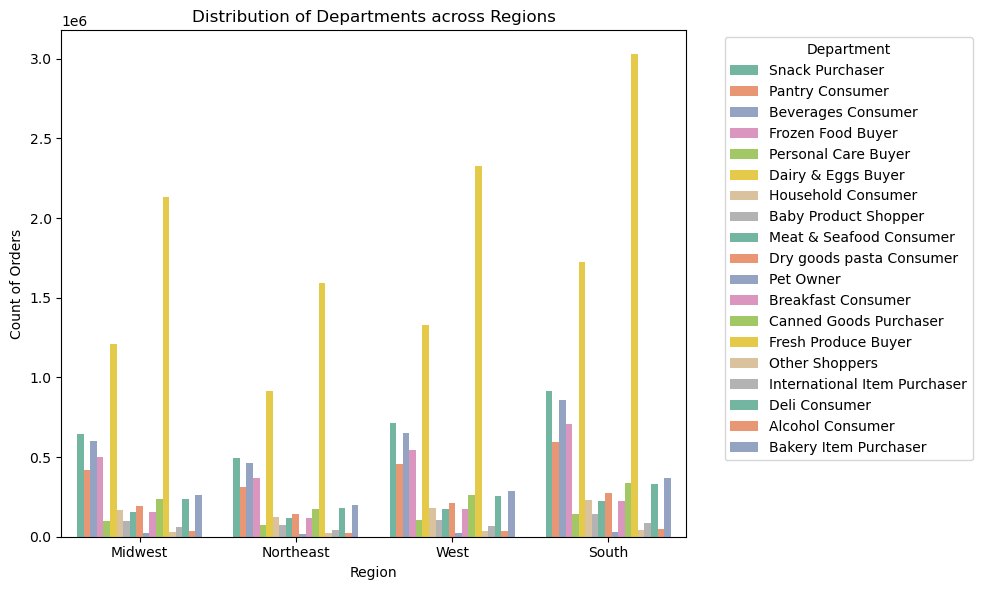

In [53]:
# Orders by departments for each region

department_regions_bar = plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x='Region', hue='department_profile', palette='Set2')
plt.title('Distribution of Departments across Regions')
plt.xlabel('Region')
plt.ylabel('Count of Orders')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Top 5 departments

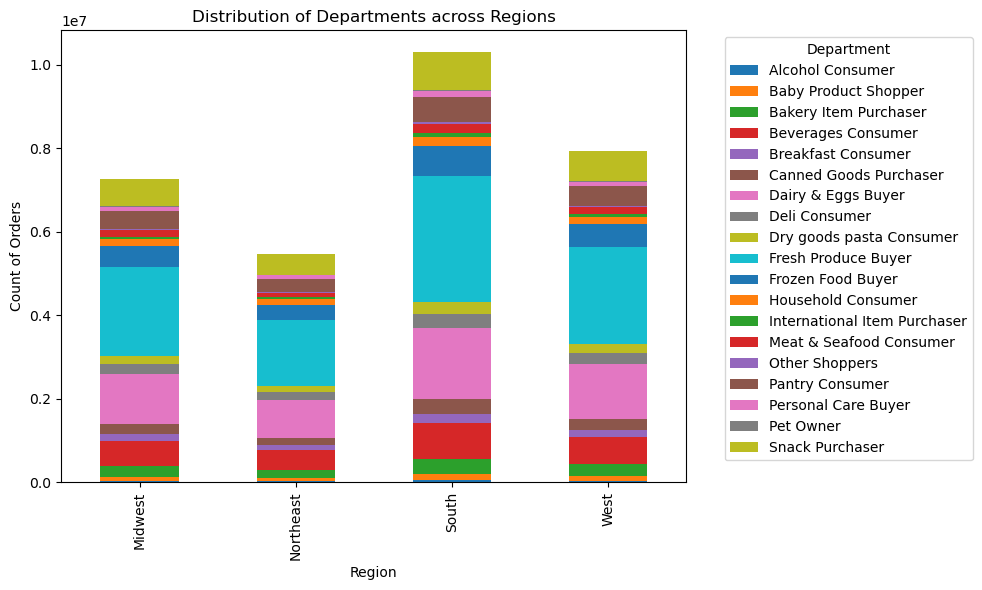

In [54]:
# Stacked bar chart of orders by departments across regions

region_department_crosstab = pd.crosstab(df_final['Region'], df_final['department_profile'])
region_department_stacked_bar = region_department_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Departments across Regions')
plt.xlabel('Region')
plt.ylabel('Count of Orders')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [55]:
# Checking the differences in ordering habits based on a customer’s loyalty status

df_final.groupby('loyalty_flag').agg({'prices': ['mean', 'median', 'min', 'max']})

prices                  
                      mean median  min   max
loyalty_flag                                
Loyal customer    7.773575    7.4  1.0  25.0
New customer      7.801665    7.4  1.0  25.0
Regular customer  7.798262    7.4  1.0  25.0

In [56]:
# Comparing the age_profile and dependents_profile with order frequency

order_freq_age_dependents_ct = pd.crosstab(index=df_final['age_profile'], columns=df_final['dependents_profile'], values=df_final['order_frequency'], aggfunc='mean')
order_freq_age_dependents_ct

dependents_profile,Large Family,Single,Small Family
age_profile,,,
Middle Aged,9.974582,9.931305,9.982001
Senior,9.995396,9.874549,9.966840
Young Adult,9.805089,10.063159,9.951654


In [57]:
# Comparing the age_profile and dependents_profile with prices

order_freq_age_dependents_prices_ct = pd.crosstab(index=df_final['age_profile'], columns=df_final['dependents_profile'], values=df_final['prices'], aggfunc='mean')
order_freq_age_dependents_prices_ct

dependents_profile,Large Family,Single,Small Family
age_profile,,,
Middle Aged,7.796063,7.788679,7.788456
Senior,7.788117,7.801014,7.796354
Young Adult,7.793638,7.770795,7.782123


In [58]:
# Customer profile cross-tabulation for 'order_frequency'

order_freq_ct = pd.pivot_table(df_final, values='order_frequency', index=['age_profile', 'income_profile', 'dependents_profile'], aggfunc='mean')
order_freq_ct

order_frequency
age_profile income_profile dependents_profile                 
Middle Aged High Income    Large Family               9.879867
                           Single                     9.812812
                           Small Family               9.973803
            Low Income     Large Family              10.726996
                           Single                    10.498628
                           Small Family              10.575576
            Middle Income  Large Family               9.884103
                           Single                     9.913779
                           Small Family               9.843111
Senior      High Income    Large Family               9.889259
                           Single                     9.797045
                           Small Family               9.883705
            Low Income     Large Family              10.285582
                           Single                    10.448109
                           Small Family              10.479009
            Middle Income  Large Family              10.235060
                           Single                     9.912337
                           Small Family              10.036558
Young Adult High Income    Large Family              10.275412
                           Single                     9.303160
                           Small Family               9.508288
            Low Income     Large Family              10.682436
                           Single                    10.410526
                           Small Family              10.420955
            Middle Income  Large Family               9.630446
                           Single                    10.023961
                           Small Family               9.880550

In [59]:
# Customer profile cross-tabulation for 'prices'

prices_ct = pd.pivot_table(df_final, values='prices', index=['age_profile', 'income_profile', 'dependents_profile'], aggfunc='mean')
prices_ct

prices
age_profile income_profile dependents_profile          
Middle Aged High Income    Large Family        7.957427
                           Single              7.948718
                           Small Family        7.956998
            Low Income     Large Family        6.737485
                           Single              6.711653
                           Small Family        6.693282
            Middle Income  Large Family        7.894131
                           Single              7.891006
                           Small Family        7.886310
Senior      High Income    Large Family        7.946033
                           Single              7.951657
                           Small Family        7.958974
            Low Income     Large Family        6.487729
                           Single              6.521297
                           Small Family        6.519808
            Middle Income  Large Family        7.778185
                           Single              7.786728
                           Small Family        7.764236
Young Adult High Income    Large Family        7.903759
                           Single              7.957131
                           Small Family        7.827010
            Low Income     Large Family        6.875589
                           Single              6.894898
                           Small Family        6.902568
            Middle Income  Large Family        7.954169
                           Single              7.942536
                           Small Family        7.945892

## 9. Creating Charts to Illustrate the Results

#### Produce suitable charts to illustrate your results and export them in your project folder.

#### - Charts for the task were created within the steps above. 
#### - Additional charts to help answer the "key questions" in the project brief are included below.

### key question 3
#### - Instacart has a lot of products with different price tags. 
#### - Marketing and sales want to use simpler price range groupings to help direct their efforts.

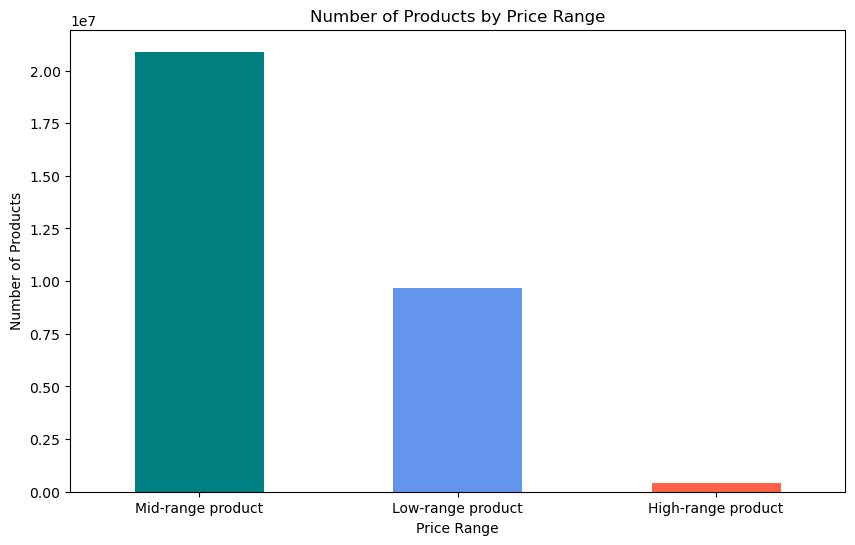

In [60]:
# Visalization of price range groupings for "key question" number 3

price_range_counts = df_final['price_range_loc'].value_counts()
plt.figure(figsize=(10, 6))
price_range_counts.plot(kind='bar', color=['teal', 'cornflowerblue', 'tomato'])
plt.title('Number of Products by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Products')
plt.xticks(rotation=0)
price_range_bar = plt.gcf()
plt.show()

### Key question 4
#### - Are there certain types of products that are more popular than others? 
#### - The marketing and sales teams want to know which departments have the highest frequency of product orders.

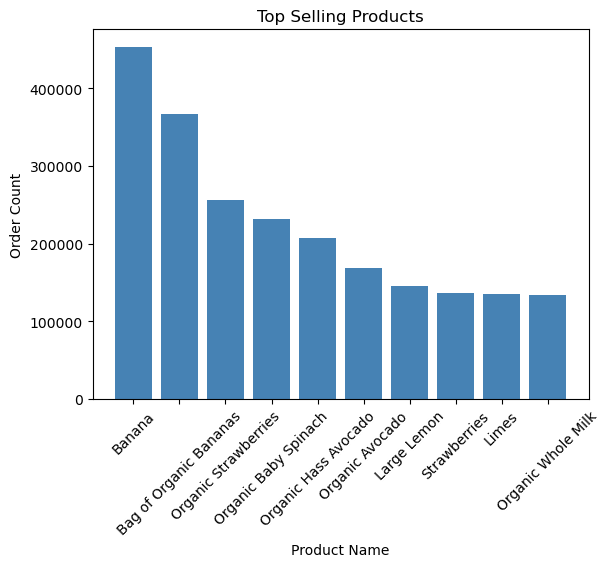

In [61]:
# Visualize the top selling products for "key question" number 4

product_order_counts = df_final['product_id'].value_counts().reset_index()
product_order_counts.columns = ['product_id', 'order_count']
product_order_counts = product_order_counts.merge(df_final[['product_id', 'product_name']].drop_duplicates(), on='product_id')
top_selling_products = product_order_counts.sort_values('order_count', ascending=False).head(10)
plt.bar(top_selling_products['product_name'], top_selling_products['order_count'], color='steelblue')
plt.xlabel('Product Name')
plt.ylabel('Order Count')
plt.title('Top Selling Products')
plt.xticks(rotation=45)
top_selling_products_bar = plt.gcf()
plt.show()

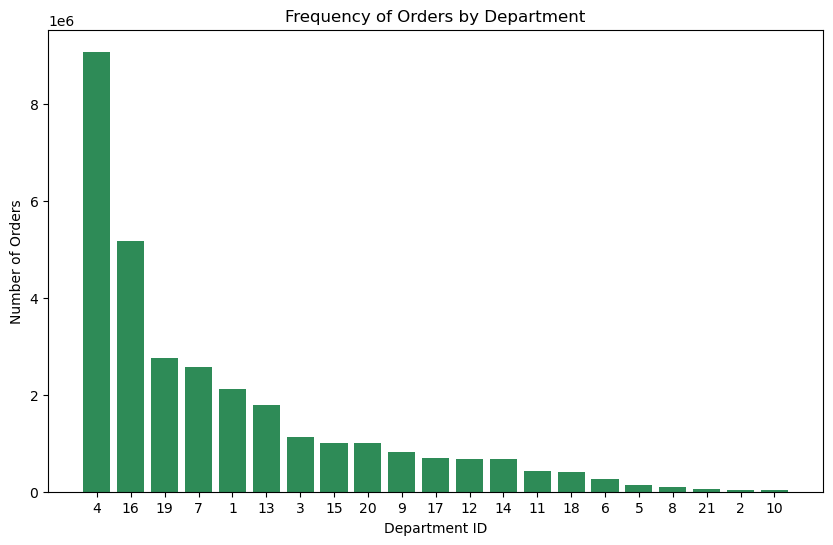

In [62]:
# Visualize the frequency of orders for departments for "key question" number 4

order_counts_per_department = df_final.groupby('department_id').size()
order_counts_per_department = order_counts_per_department.reset_index(name='order_count')
order_counts_per_department = order_counts_per_department.sort_values('order_count', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(order_counts_per_department['department_id'].astype(str), order_counts_per_department['order_count'], color='seagreen')
plt.xlabel('Department ID')
plt.ylabel('Number of Orders')
plt.title('Frequency of Orders by Department')
plt.xticks(rotation=0)
departments_order_freq_bar = plt.gcf()
plt.show()

### Key question 6
#### - Are there differences in ordering habits based on a customer’s loyalty status?

In [63]:
crosstab_frequency_loyalty = pd.crosstab(df_final['frequency_flag'],df_final['loyalty_flag'], dropna = False)

In [64]:
crosstab_frequency_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
frequency_flag,,,
Frequent customer,10279960,1293294,9631222
Non-frequent customer,0,1983500,911475
Regular customer,4133,1526901,5334079


In [65]:
crosstab_frequency_loyalty_normalized = crosstab_frequency_loyalty.div(crosstab_frequency_loyalty.sum(axis=1), axis=0) * 100
crosstab_frequency_loyalty_normalized

loyalty_flag,Loyal customer,New customer,Regular customer
frequency_flag,,,
Frequent customer,48.480142,6.099156,45.420703
Non-frequent customer,0.000000,68.515272,31.484728
Regular customer,0.060203,22.241455,77.698342


<Figure size 800x600 with 0 Axes>

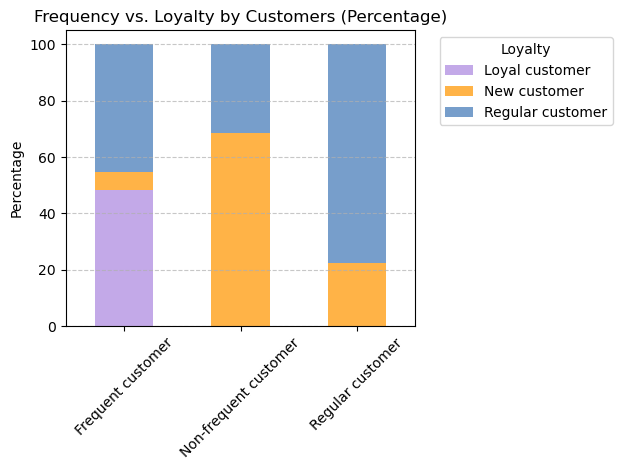

In [66]:
# Visalization of Frequency vs. Loyalty by customers

colors = ['#c3a9e8', '#ffb347', '#779ecb']  # Pastel colours: Purple, Orange, Dark Blue

plt.figure(figsize=(8, 6))  
crosstab_frequency_loyalty_normalized.plot(kind='bar', stacked=True, color=colors)
plt.title('Frequency vs. Loyalty by Customers (Percentage)')
plt.xlabel('')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Loyalty', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
frequency_loyalty_customers_bar_stacked = plt.gcf()
plt.show()

### Key question 10
#### - What differences can you find in ordering habits of different customer profiles?

In [67]:
crosstab_income_loyalty = pd.crosstab(df_final['income_profile'],df_final['loyalty_flag'], dropna = False)

In [68]:
crosstab_income_loyalty 

loyalty_flag,Loyal customer,New customer,Regular customer
income_profile,,,
High Income,4758209,2143551,7305642
Low Income,1032934,627180,1702440
Middle Income,4492950,2032964,6868694


In [69]:
crosstab_income_loyalty_normalized = crosstab_income_loyalty.div(crosstab_income_loyalty.sum(axis=1), axis=0) * 100

In [70]:
crosstab_income_loyalty_normalized

loyalty_flag,Loyal customer,New customer,Regular customer
income_profile,,,
High Income,33.491056,15.087565,51.421379
Low Income,30.718733,18.651894,50.629373
Middle Income,33.542975,15.177480,51.279545


<Figure size 800x1000 with 0 Axes>

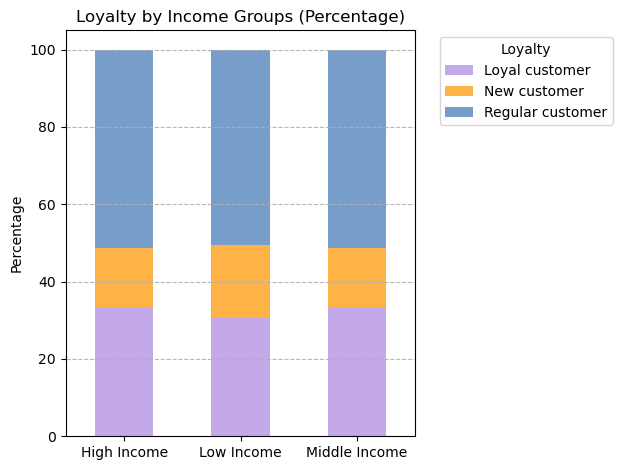

In [71]:
# Visalization of Loyalty by Income groups

colors = ['#c3a9e8', '#ffb347', '#779ecb']

plt.figure(figsize=(8, 10)) 
crosstab_income_loyalty_normalized.plot(kind='bar', stacked=True, color=colors)
plt.title('Loyalty by Income Groups (Percentage)')
plt.xlabel('')
plt.ylabel('Percentage')
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.legend(title='Loyalty',loc='upper left', bbox_to_anchor=(1.05, 1)) 
plt.tight_layout() 
loyalty_by_income_bar_stacked = plt.gcf()
plt.show()


#### Order frequency by customer

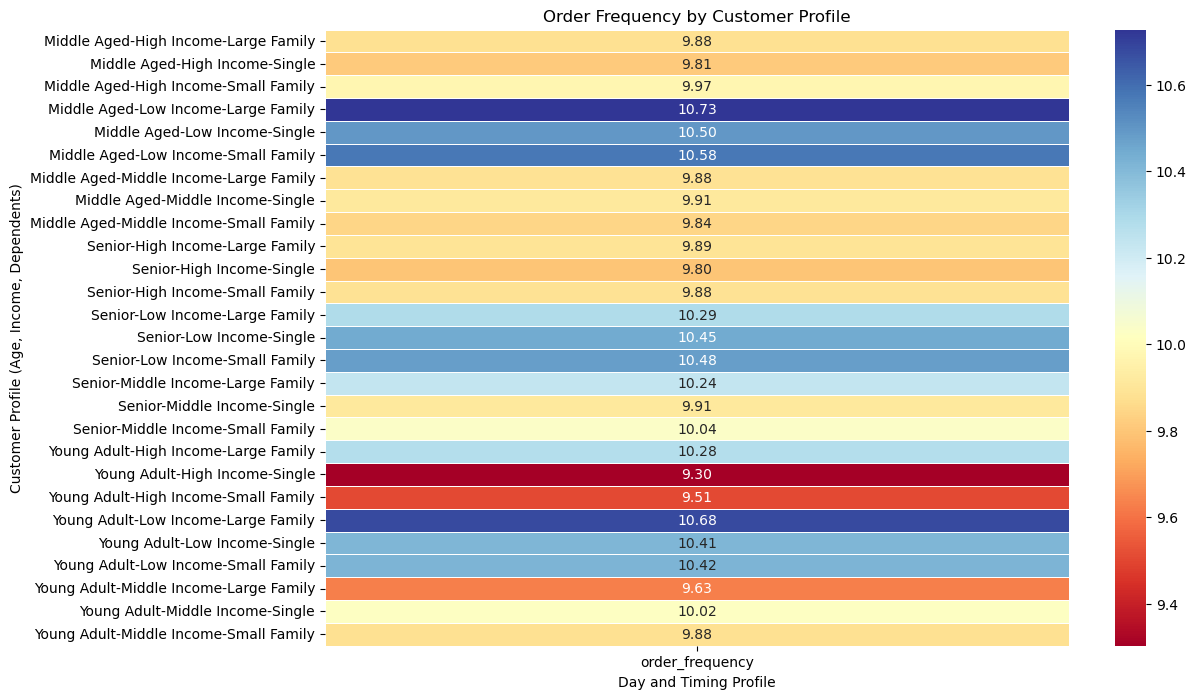

In [104]:
# Heatmap of the order frequency cross-tabulation

plt.figure(figsize=(12, 8))
sns.heatmap(order_freq_ct, annot=True, fmt=".2f", cmap='RdYlBu', linewidths=.5)
plt.title('Order Frequency by Customer Profile')
plt.xlabel('Day and Timing Profile')
plt.ylabel('Customer Profile (Age, Income, Dependents)')
order_freq_ct_heatmap_03 = plt.gcf()
plt.show()

#### Average Prices by Customer Profile

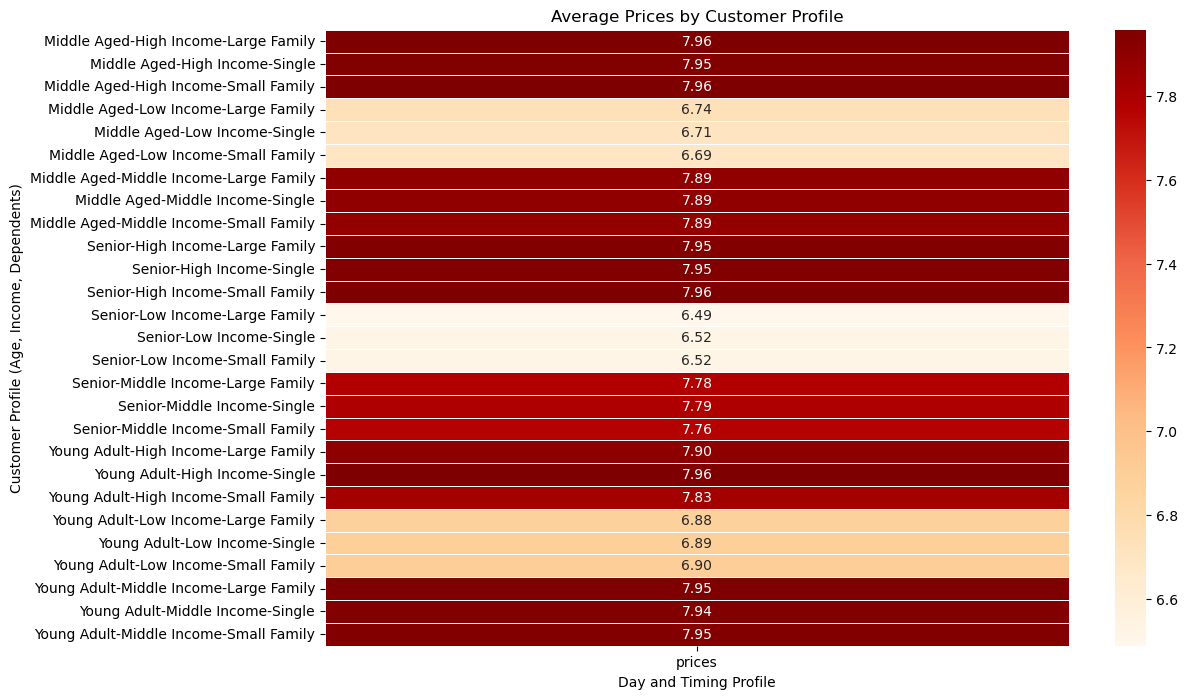

In [99]:
# Heatmap of the Average Prices by Customer Profile

plt.figure(figsize=(12, 8))
sns.heatmap(prices_ct, annot=True, fmt=".2f", cmap='OrRd', linewidths=.5)
plt.title('Average Prices by Customer Profile')
plt.xlabel('Day and Timing Profile')
plt.ylabel('Customer Profile (Age, Income, Dependents)')
prices_ct_heatmap_03 = plt.gcf()
plt.show()

### Exporting all visualizations to the corresponding project folder:
/06-05-2024 Instacart Basket Analysis/04 Analysis/Visualizations

In [74]:
bar_spending_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_by_region.png'))

In [75]:
bar_exclusion.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'distribution_customer_activity.png'))

In [76]:
age_profile_bar.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_profile_bar.png'))

In [77]:
income_profile_bar.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_profile_bar.png'))

In [78]:
dependents_profile_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependents_profile_pie.png'))

In [79]:
department_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_profile_bar.png'))

In [80]:
departments_profile_histo.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_profile_histo.png'))

In [81]:
timing_profile_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'timing_profile_pie.png'))

In [82]:
day_of_week_profile_bar.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'day_of_week_profile_bar.png'))

In [83]:
department_regions_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_regions_bar.png'))

In [84]:
region_department_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_department_stacked_bar.png'))

In [85]:
price_range_bar.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_bar.png'))

In [86]:
top_selling_products_bar.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top_selling_products_bar.png'))

In [87]:
departments_order_freq_bar.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_order_freq_bar.png'))

In [88]:
frequency_loyalty_customers_bar_stacked.savefig (os.path.join(path, '04 Analysis','Visualizations','frequency_loyalty_customers_bar_stacked.png'))

In [89]:
loyalty_by_income_bar_stacked.savefig (os.path.join(path, '04 Analysis','Visualizations','loyalty_by_income_bar_stacked.png'))

In [105]:
order_freq_ct_heatmap_03.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_freq_ct_heatmap_03.png'))

In [106]:
prices_ct_heatmap_03.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_ct_heatmap_03.png'))

## 10. Exporting the Final Dataset

In [92]:
print(df_final.head())
print(df_final.info())
df_final.shape

  product_id                product_name aisle_id department_id  prices  \
0          1  Chocolate Sandwich Cookies       61            19     5.8   
1          1  Chocolate Sandwich Cookies       61            19     5.8   
2          1  Chocolate Sandwich Cookies       61            19     5.8   
5          1  Chocolate Sandwich Cookies       61            19     5.8   
6          1  Chocolate Sandwich Cookies       61            19     5.8   

  order_id user_id  order_number  orders_day_of_week  order_hour_of_day  ...  \
0  3139998     138            28                   6                 11  ...   
1  1977647     138            30                   6                 17  ...   
2   389851     709             2                   0                 21  ...   
5  1701441     777            16                   1                  7  ...   
6  1871483     825             3                   2                 14  ...   

   income  _merge     Region  exclusion_flag  age_profile income_pro

(30964564, 40)

In [93]:
# Export the cleaned and processed data

df_final.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_dataset.pkl'))